# SPAM EMAIL DETECTION


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
df=pd.read_csv(r"C:\Users\HP\Desktop\spam.csv" , encoding='ISO-8859-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [53]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.describe()


,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [55]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [57]:
df.shape

(5572, 2)

In [58]:
df.columns
df=df.drop_duplicates()

In [59]:
fig = px.histogram(df, x='v1', color='v1', color_discrete_map=color, title='Number of Spam and Ham')
fig.update_layout(
    xaxis=dict(title='Label'),
    yaxis=dict(title='Count'),
    showlegend=False,  # To hide the legend if not needed
)
fig.show()

In [67]:
#VISUALIZING LENGTH OF MAILS
df['length'] =df['v2'].apply(len)

fig = px.histogram(df, x='length', color='v1', barmode='overlay', nbins=50, title='Distribution of Email Length')
fig.update_layout(
    xaxis=dict(title='Length of Email'),
    yaxis=dict(title='Count'),
)
fig.show()

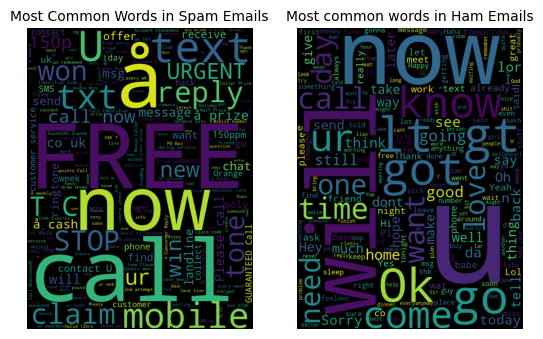

In [68]:
#Visualizing most common words in spam and ham emails

from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_text=' '.join(df[df ['v1']=='spam']['v2']) 
ham_text =' '.join(df[df['v1'] == 'ham']['v2'])

spam_wordcloud = WordCloud(width=600, height=800, background_color='black').generate(spam_text) 
ham_wordcloud = WordCloud (width=600, height=800, background_color='black').generate(ham_text)

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud,)
plt.axis('off') 
plt.title('Most Common Words in Spam Emails',fontdict={'fontsize':10})

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud) 
plt.axis('off')
plt.title('Most common words in Ham Emails', fontdict={'fontsize':10})

plt.show()

In [69]:
a=df['v2']
a

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [70]:
b=df['v1']
b

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5169, dtype: object

In [71]:
from sklearn.model_selection import train_test_split

a_train,a_test,b_train,b_test = train_test_split(df['v2'],df['v1'],test_size=0.2, random_state=42)

print(df['v2'].shape)
print(a_train.shape)
print(a_test.shape)


(5169,)
(4135,)
(1034,)


In [72]:
ppl=Pipeline([
    ('vectorizer',CountVectorizer(stop_words='english')),
    ('classifier',MultinomialNB())
])

In [73]:
ppl.fit(a_train,b_train)


Pipeline(steps=[('vectorizer', CountVectorizer(stop_words='english')),
                ('classifier', MultinomialNB())])

In [74]:
b_pred=ppl.predict(a_test)


In [75]:
# Analyzing Accuracy
print('Accuracy:',accuracy_score(b_test,b_pred))

Accuracy: 0.9835589941972921


In [76]:
# Assessing precision
print('Precesion:',precision_score(b_test,b_pred,pos_label='spam'))

Precesion: 0.9705882352941176


In [77]:
# Calculating Recall
print('Recall:',recall_score(b_test,b_pred,pos_label="spam"))

Recall: 0.9103448275862069


In [78]:
# Assessing F1-score
print('F1:',f1_score(b_test,b_pred,pos_label="spam"))

F1: 0.9395017793594306


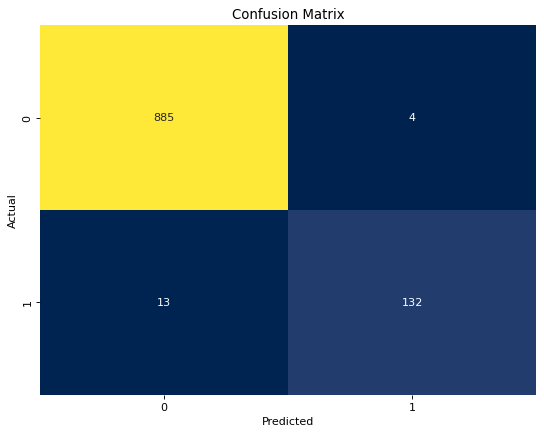

In [79]:
# Visualizing confusion matrix

from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

confm = confusion_matrix(b_test, b_pred)
plt.figure(figsize=(8, 6), dpi=80) 
sns.heatmap(confm, annot=True, fmt="d", cmap="cividis", cbar=False) 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
report=classification_report(b_test,b_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       889
        spam       0.97      0.91      0.94       145

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [89]:
# Test the model
mail1=["you have WON cash 5000 prize!"]
print(ppl.predict(mail1))


['spam']


In [90]:
mail2=["Please forward me the list of the new interns today"]
print(ppl.predict(mail2))

['ham']


In [91]:
mail3=["Your job alert for engineer"]
print(ppl.predict(mail3))


['ham']
